# **Introduction**
* Efficient traffic management is paramount in modern transportation systems. The dataset being analyzed contains detailed information captured by various traffic cameras, encompassing factors such as geographical coordinates, timestamps, traffic flow, and more.
* Analyzing this dataset can offer crucial insights into traffic patterns, contributing to improved traffic management, infrastructure development, and a deeper comprehension of the multifaceted elements influencing traffic dynamics.

## Project Overview
* This project is aimed at conducting a comprehensive analysis and modeling based on a dataset retrieved from traffic cameras. The dataset encapsulates diverse features including Timestamp, Camera ID, geospatial coordinates, direction, highway specifics, traffic status, vehicle speed, traffic flow, and traffic concentration.
* The initiative involves data preprocessing, exploratory data analysis (EDA), feature engineering, and potential modeling to glean profound insights and potentially forecast traffic flow or status.

# Problem Statement
The primary objective of this project is to delve into the traffic data collected from multiple cameras to unravel traffic behavior, recognize underlying patterns, and potentially forecast traffic flow or status.
* A few central challenges include handling missing data, transforming features from categorical and temporal data, and constructing a model capable of accurately predicting traffic flow or status based on multifaceted parameters.

# Objectives
## General Objectives
* Exploratory Data Analysis (EDA): Conduct comprehensive EDA to understand the distribution, patterns, and relationships among different features in the dataset.
* Data Preprocessing: Clean and preprocess the dataset by handling missing values, encoding categorical variables, and scaling numerical features.
* Feature Engineering: Extract relevant information from the timestamp, perform one-hot encoding for categorical features, and create new attributes for enhanced analysis.
* Predictive Modeling: Utilize machine learning models to predict traffic flow or status based on available features.
* Evaluation and Insights: Evaluate model performance, identify significant features, and derive insights to aid in traffic management and planning.

## Data Understanding
* Camera ID
* Measurement timestamp
* Direction ( from town, to town)
* Latitude and longitude of the camera
* Distance from the camera to the start of the motorway (camera at km x)
* Average speed in km/h
* Traffic concentration in percentage
* Traffic flow in number of cars per hour

## Load the Required Libraries

In [1]:
import os
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder


## Data Munging

In [4]:
data_2 = pd.read_csv(r"C:\Users\wanji\Desktop\Green speed notebook\Green-Speed\green-hack\datexDataA13 clean.csv")
data_2

,Camera ID,TimeStamp,Latitude,Longitude,Direction,Highway,Traffic Status,Average Vehicle Speed,Vehicle Flow,Traffic Concentration
0,A13.PS.35385,2019-11-19T07:39:00.000+01:00,49.502388,6.305461,outboundFromTown,A13,freeFlow,153.0,200,0
1,A13.PS.27220,2019-11-19T07:39:00.000+01:00,49.509060,6.206102,outboundFromTown,A13,unknown,NaN,0,0
2,A13.PTAES.4962,2019-11-19T07:39:00.000+01:00,49.530857,5.941860,inboundTowardsTown,A13,freeFlow,101.0,1881,4
3,A13.PS.13460,2019-11-19T07:39:00.000+01:00,49.511353,6.031762,outboundFromTown,A13,unknown,NaN,0,0
4,A13.SP.23974,2019-11-19T07:39:00.000+01:00,49.508278,6.163718,inboundTowardsTown,A13,freeFlow,123.0,2716,3
...,...,...,...,...,...,...,...,...,...,...
816863,A13.PTMAS.39179,2019-12-26T09:34:00.000+01:00,49.480038,6.343385,outboundFromTown,A13,freeFlow,100.0,207,0
816864,A13.STFRP.26477,2019-12-26T09:34:00.000+01:00,49.507000,6.196411,inboundTowardsTown,A13,freeFlow,93.0,174,1
816865,A13.SP.35385,2019-12-26T09:34:00.000+01:00,49.502422,6.305594,inboundTowardsTown,A13,freeFlow,132.0,153,0
816866,A13.SP.7944,2019-12-26T09:34:00.000+01:00,49.518810,5.972471,outboundFromTown,A13,freeFlow,92.0,253,0



* Dataset Info
* Statistics: count, mean, median, std(standard deviation)
* Shape
* Columns, Column names and Datatypes

In [5]:
# checking A13's data
data_2.describe()


,Latitude,Longitude,Average Vehicle Speed,Vehicle Flow,Traffic Concentration
count,816868.000000,816868.000000,613420.000000,816868.000000,816868.000000
mean,49.508072,6.157052,103.492835,544.078395,1.272714
std,0.051175,0.160656,20.046577,607.458282,1.990619
min,7.000000,5.903059,0.000000,0.000000,0.000000
25%,49.493477,5.972471,92.000000,35.000000,0.000000
50%,49.509060,6.194627,103.000000,309.000000,0.000000
75%,49.519505,6.322593,116.000000,875.000000,2.000000
max,49.555190,6.364823,250.000000,5186.000000,48.000000


In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816868 entries, 0 to 816867
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Camera ID              816868 non-null  object 
 1   TimeStamp              816868 non-null  object 
 2   Latitude               816868 non-null  float64
 3   Longitude              816868 non-null  float64
 4   Direction              816868 non-null  object 
 5   Highway                816868 non-null  object 
 6   Traffic Status         816868 non-null  object 
 7   Average Vehicle Speed  613420 non-null  float64
 8   Vehicle Flow           816868 non-null  int64  
 9   Traffic Concentration  816868 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 62.3+ MB


## Check if there are missing values in the dataset

In [7]:
# checking for null values
data_2.isnull().sum()

Camera ID                     0
TimeStamp                     0
Latitude                      0
Longitude                     0
Direction                     0
Highway                       0
Traffic Status                0
Average Vehicle Speed    203448
Vehicle Flow                  0
Traffic Concentration         0
dtype: int64

* From the above output we have missing values for the 'Average Vehicle Speed' column

In [8]:
# filling in the null values
data_2['Average Vehicle Speed'] = data_2['Average Vehicle Speed'].fillna(data_2['Average Vehicle Speed'].mean())
data_2.isnull().sum()

Camera ID                0
TimeStamp                0
Latitude                 0
Longitude                0
Direction                0
Highway                  0
Traffic Status           0
Average Vehicle Speed    0
Vehicle Flow             0
Traffic Concentration    0
dtype: int64

* The missing values for the column is solved by mean a statistical method because its an efficient method, particularly for numerical data and in this case the missing values/ rather the column contains numerical values and after we can confirm that there are no missing values in the dataset

In [9]:
data_2.head()

,Camera ID,TimeStamp,Latitude,Longitude,Direction,Highway,Traffic Status,Average Vehicle Speed,Vehicle Flow,Traffic Concentration
0,A13.PS.35385,2019-11-19T07:39:00.000+01:00,49.502388,6.305461,outboundFromTown,A13,freeFlow,153.000000,200,0
1,A13.PS.27220,2019-11-19T07:39:00.000+01:00,49.509060,6.206102,outboundFromTown,A13,unknown,103.492835,0,0
2,A13.PTAES.4962,2019-11-19T07:39:00.000+01:00,49.530857,5.941860,inboundTowardsTown,A13,freeFlow,101.000000,1881,4
3,A13.PS.13460,2019-11-19T07:39:00.000+01:00,49.511353,6.031762,outboundFromTown,A13,unknown,103.492835,0,0
4,A13.SP.23974,2019-11-19T07:39:00.000+01:00,49.508278,6.163718,inboundTowardsTown,A13,freeFlow,123.000000,2716,3


# Checking for outliers
* This step is important to check for data abnormalies or erroneous data points that deviate from the rest of the data, because they affect the accuarcy of the predictive models

In [10]:
# Checking for outliers

# Define a function to detect outliers using IQR
def find_outliers_iqr(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data_series < lower_bound) | (data_series > upper_bound)

# To find outliers in a specific column:
outliers = find_outliers_iqr(data_2)

print("Outliers:")
print(outliers)

Outliers:
        Average Vehicle Speed  Camera ID  Direction  Highway  Latitude  \
0                        True      False      False    False     False   
1                       False      False      False    False     False   
2                       False      False      False    False     False   
3                       False      False      False    False     False   
4                       False      False      False    False     False   
...                       ...        ...        ...      ...       ...   
816863                  False      False      False    False     False   
816864                  False      False      False    False     False   
816865                  False      False      False    False     False   
816866                  False      False      False    False     False   
816867                  False      False      False    False     False   

        Longitude  TimeStamp  Traffic Concentration  Traffic Status  \
0           False      False  

* From the Output:
* There are no Outliers

# EDA
* Distribution of average vehicle speed, traffic concentration and vehicle flow


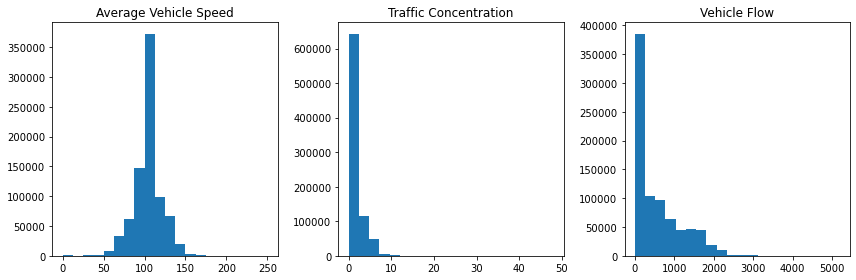

In [11]:
# Visualizing data & relationships
# Create histograms for "Average vehicle speed," "Traffic concentration," and "Vehicle flow"
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(data_2['Average Vehicle Speed'], bins=20)
plt.title('Average Vehicle Speed')

plt.subplot(132)
plt.hist(data_2['Traffic Concentration'], bins=20)
plt.title('Traffic Concentration')

plt.subplot(133)
plt.hist(data_2['Vehicle Flow'], bins=20)
plt.title('Vehicle Flow')

plt.tight_layout()
plt.show()

*  The plot above represent distribution of the numerical features.
* 'Average Vehicle Speed' in this case

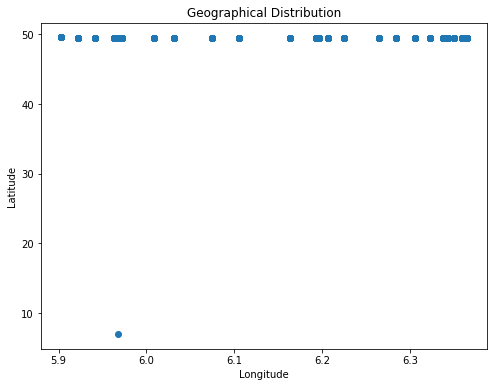

In [12]:
# Create a scatter plot of "Latitude" vs. "Longitude"
plt.figure(figsize=(8, 6))
plt.scatter(data_2['Longitude'], data_2['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution')
plt.show()

* Geographical Distribution Visualization:

Output:
*  A scatter plot that visualizes the geographical distribution of data points on a coordinate plane with longitude on the x-axis and latitude on the y-axis.

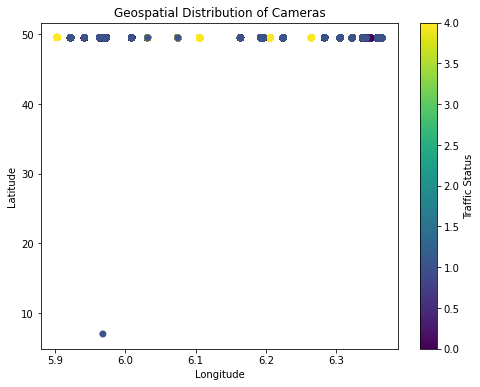

In [13]:
# Geospatial Visualization vs   Traffic Status
plt.figure(figsize=(8, 6))
plt.scatter(data_2['Longitude'], data_2['Latitude'], c=data_2['Traffic Status'].astype('category').cat.codes)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Cameras')
plt.colorbar(label='Traffic Status')
plt.show()

 Output:
* A scatter plot that visualizes the geographical location of the traffic camera.

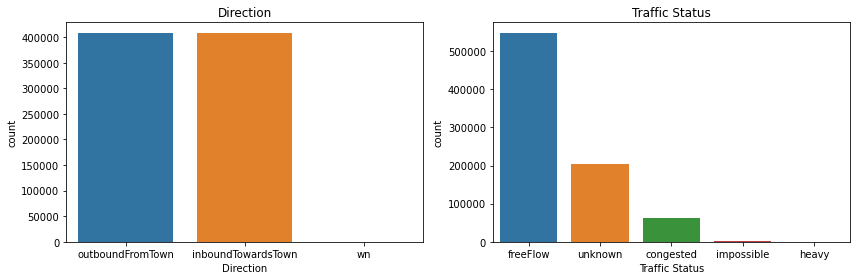

In [14]:
# 3. visualizing frequency of unique values in categorical columns
import seaborn as sns

# Create count plots for "Direction" and "Traffic status"
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.countplot(data=data_2, x='Direction')
plt.title('Direction')

plt.subplot(122)
sns.countplot(data=data_2, x='Traffic Status')
plt.title('Traffic Status')

plt.tight_layout()
plt.show()

* Two separate count plots showing the frequency of categorical variables "Direction" and "Traffic Status."
* The count plot for "Direction" indicates that two directions (categories) are roughly at the same level, each with approximately 400 occurrences. This suggests that the data for these two directions are somewhat balanced or equally represented.

In [15]:
# Remove the time zone information (+01:00) from the 'TimeStamp' column
data_2['TimeStamp'] = data_2['TimeStamp'].str.replace(r'\+\d+:\d+', '', regex=True)

# Convert 'TimeStamp' to datetime
data_2['TimeStamp'] = pd.to_datetime(data_2['TimeStamp'], format='%Y-%m-%dT%H:%M:%S.000', errors='coerce')

# Drop any missing values
data_2 = data_2.dropna(subset=['TimeStamp'])
# Check the updated 'TimeStamp' column
print(data_2['TimeStamp'])

0        2019-11-19 07:39:00
1        2019-11-19 07:39:00
2        2019-11-19 07:39:00
3        2019-11-19 07:39:00
4        2019-11-19 07:39:00
                 ...        
816863   2019-12-26 09:34:00
816864   2019-12-26 09:34:00
816865   2019-12-26 09:34:00
816866   2019-12-26 09:34:00
816867   2019-12-26 09:34:00
Name: TimeStamp, Length: 816866, dtype: datetime64[ns]


<ipython-input-16-c16cdd69d839>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['TimeStamp'] = pd.to_datetime(data_2['TimeStamp'])


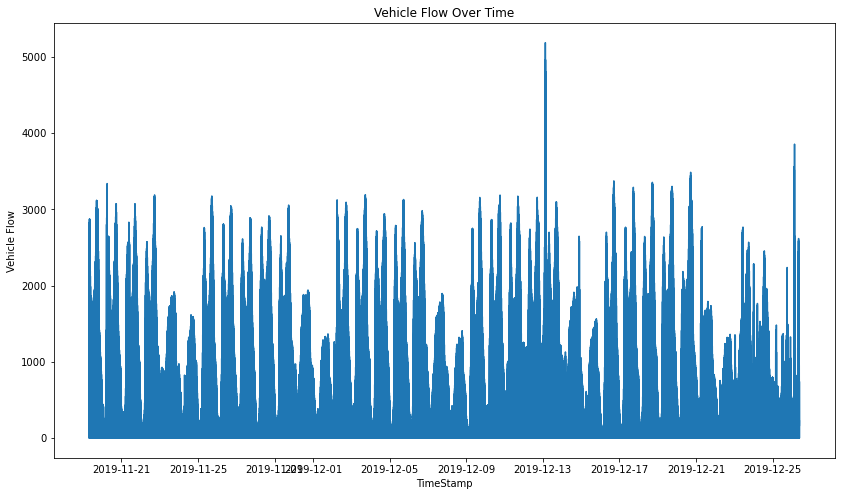

In [16]:
# Time Series Analysis
data_2['TimeStamp'] = pd.to_datetime(data_2['TimeStamp'])
plt.figure(figsize =(14,8))
plt.plot(data_2['TimeStamp'], data_2['Vehicle Flow'])
plt.title('Vehicle Flow Over Time')
plt.xlabel('TimeStamp')
plt.ylabel('Vehicle Flow')
plt.show()

* A line plot showing the trend of "Vehicle Flow" over time by visualizing the data
* The output from the TimeStamp  plot above shows the distribution of time from high peak hours , moderate and low peak hours

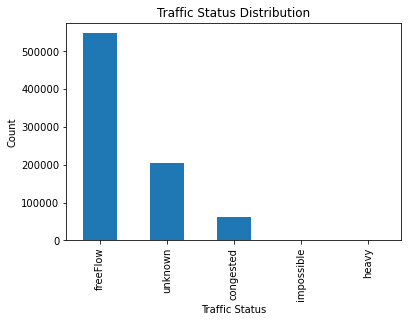

In [17]:
# Traffic Status Analysis
traffic_status_counts = data_2['Traffic Status'].value_counts()
traffic_status_counts.plot(kind='bar')
plt.title('Traffic Status Distribution')
plt.xlabel('Traffic Status')
plt.ylabel('Count')
plt.show()


* Bar plots providing insights into the distribution of traffic status in this case having freeFlow representing the highesr , followed by unknown , congested, impossoble and heavy being the least

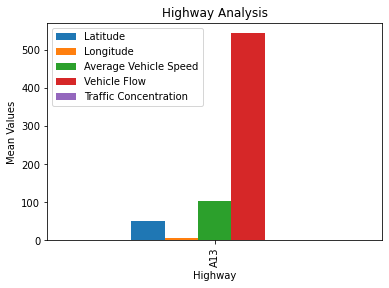

In [18]:
 # Highway Analysis
highway_data = data_2.groupby('Highway').mean()
highway_data.plot(kind='bar')
plt.title('Highway Analysis')
plt.ylabel('Mean Values')
plt.show()

* This bar plot summarizes the mean values for different attributes grouped by the "Highway."
* The output shows the comparison of mean values across various highways. For example, "Vehicle Flow" has a higher mean value compared to other attributes across highways. "Average Vehicle Speed" has a relatively lower mean, followed by "Longitude" and "Latitude."

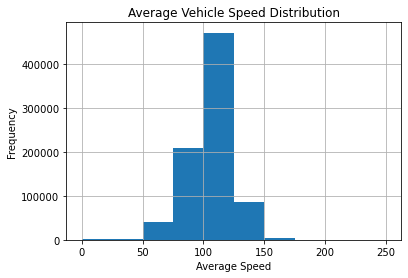

In [19]:
# Average Vehcle Speed
data_2['Average Vehicle Speed'].hist()
plt.title('Average Vehicle Speed Distribution')
plt.xlabel('Average Speed')
plt.ylabel('Frequency')
plt.show()


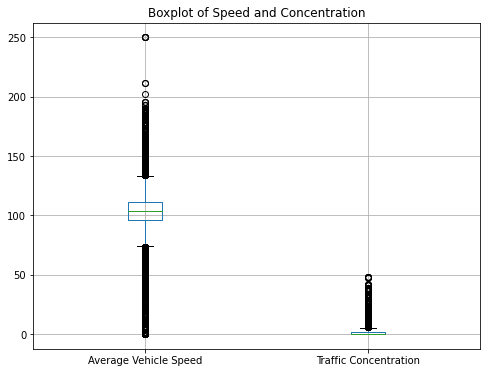

In [20]:
# Average Vehcle Speed vs Speed Concentration
plt.figure(figsize=(8, 6))
data_2.boxplot(column=['Average Vehicle Speed', 'Traffic Concentration'])
plt.title('Boxplot of Speed and Concentration')
plt.show()

* This boxplot compares the distributions of "Average Vehicle Speed" and "Traffic Concentration."
* It visually displays the median, quartiles, and outliers for these two features. The boxplot gives an idea of the central tendency and the spread of the data for these two numerical attributes.

<ipython-input-21-83bfc41042a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Month'] = data_2['TimeStamp'].dt.month


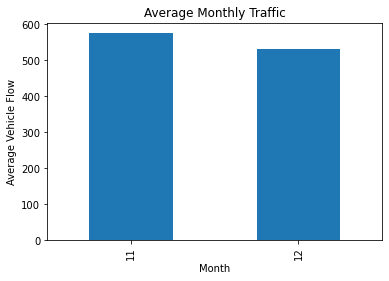

In [21]:
data_2['Month'] = data_2['TimeStamp'].dt.month
monthly_traffic = data_2.groupby('Month')['Vehicle Flow'].mean()
monthly_traffic.plot(kind='bar')
plt.title('Average Monthly Traffic')
plt.xlabel('Month')
plt.ylabel('Average Vehicle Flow')
plt.show()


* The plot above shows the monthly performance of traffic. In this case from the output we have month with the highest traffic and hour 12 following closely

<ipython-input-22-c11107fc2376>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Hour'] = data_2['TimeStamp'].dt.hour


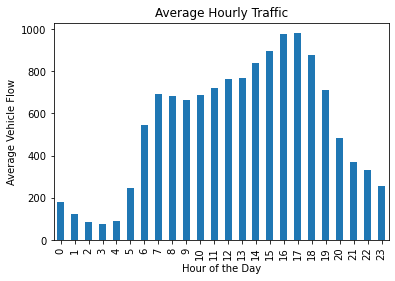

In [22]:
# Hourly Traffic Trends
data_2['Hour'] = data_2['TimeStamp'].dt.hour
hourly_traffic = data_2.groupby('Hour')['Vehicle Flow'].mean()
hourly_traffic.plot(kind='bar')
plt.title('Average Hourly Traffic')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Vehicle Flow')
plt.show()


* Plot Output:
Th plot above shows hourly distribution of the vehicle flow. For example hour of the day '16' and 17' represent the highest average vehicle flow, This also shows the busiest hours as well

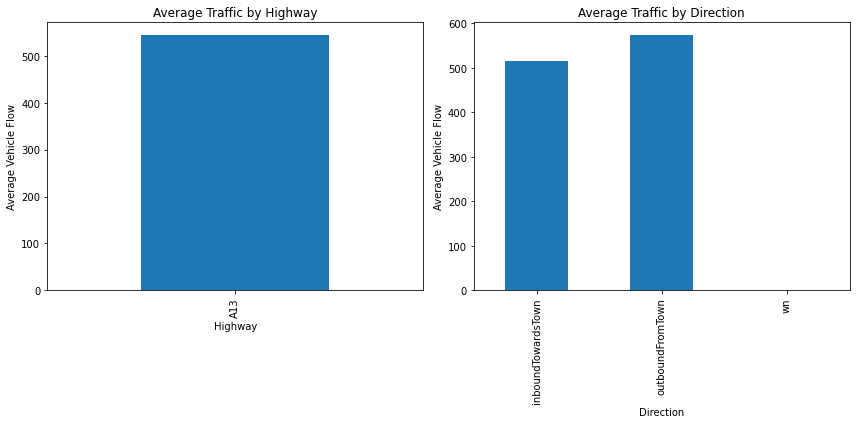

In [23]:
# How Highway and Direction act on Traffic
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
data_2.groupby('Highway')['Vehicle Flow'].mean().plot(kind='bar', ax=axes[0])
data_2.groupby('Direction')['Vehicle Flow'].mean().plot(kind='bar', ax=axes[1])
axes[0].set_title('Average Traffic by Highway')
axes[0].set_ylabel('Average Vehicle Flow')
axes[1].set_title('Average Traffic by Direction')
axes[1].set_ylabel('Average Vehicle Flow')
plt.tight_layout()
plt.show()


* Average Traffic by direction in this case shows that 'outbound from Town' direction has a higher vehicle flow showing that the vehicle flow is busiestcomapred to 'inbound towards town'.


In [24]:
from wordcloud import WordCloud

# 'Traffic Status' is the textual column
text = ' '.join(data_2['Traffic Status'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Traffic Status')
plt.show()


AttributeError: 'TransposedFont' object has no attribute 'getbbox'

<ipython-input-53-4adcf9ae32b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Sentiment'] = data_2['Traffic Status'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


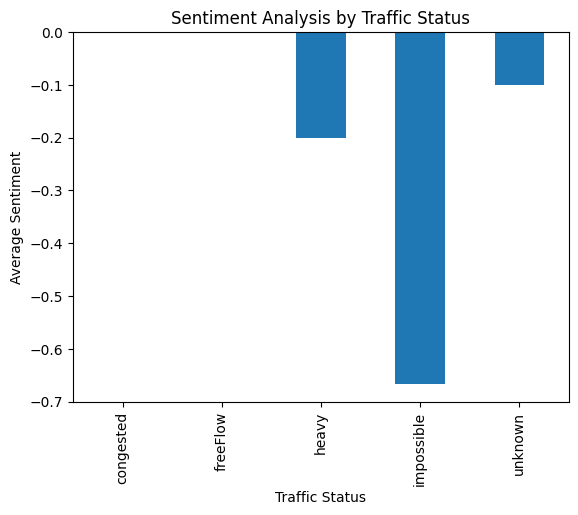

In [ ]:
from textblob import TextBlob

# Assuming 'Traffic Status' is the column containing textual data
data_2['Sentiment'] = data_2['Traffic Status'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data_2.groupby('Traffic Status')['Sentiment'].mean().plot(kind='bar')
plt.title('Sentiment Analysis by Traffic Status')
plt.xlabel('Traffic Status')
plt.ylabel('Average Sentiment')
plt.show()



Output
- The output demonstrates the average sentiment polarity for each 'Traffic Status' category, showcasing the sentiment associated with various traffic conditions. For instance, "impossible" might have a higher average sentiment, while "congested" could have a lower average sentiment.

<ipython-input-54-026f962948a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_2.corr()


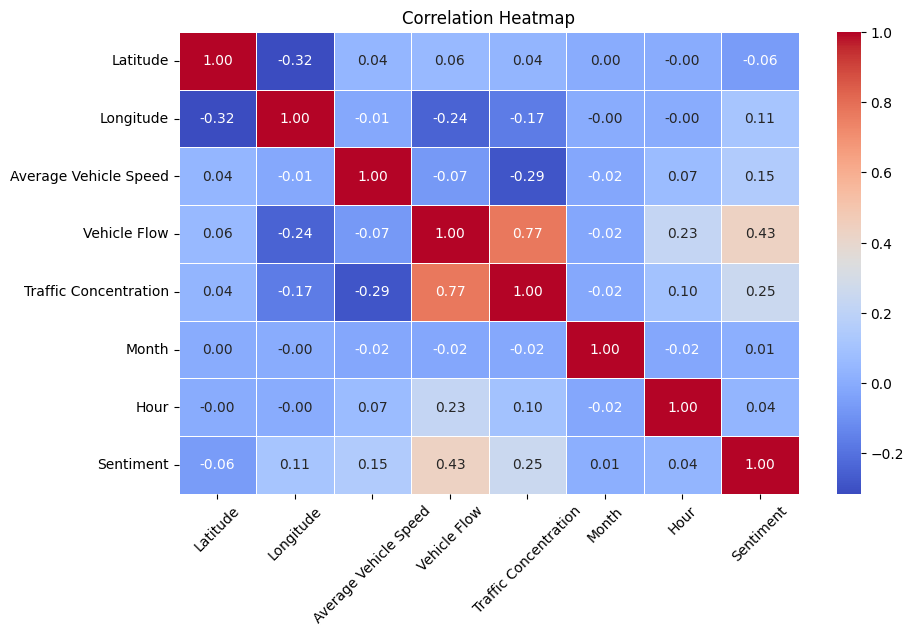

In [ ]:
# Correlation matrix using a heatmap
correlation_matrix = data_2.corr()
 # Increase the figure size
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Add annotations and adjust line widths
plt.title("Correlation Heatmap")
 # Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.show()

* Results
Latitude & Longitude:

There's a moderate negative correlation between Latitude and Longitude (-0.33). This might imply that as one feature increases, the other tends to decrease, but not in a perfectly linear fashion.
Average Vehicle Speed & Other Features:

There's a very weak positive correlation between Average Vehicle Speed and Latitude (0.04), which suggests a negligible linear relationship between these two features.
There's a very weak negative correlation between Longitude and Average Vehicle Speed (-0.02).
Vehicle Flow & Other Features:

Vehicle Flow shows some notable correlations:
Positively correlated with Latitude (0.06), indicating a slight tendency to increase together.
Negatively correlated with Longitude (-0.25), suggesting a slight tendency to decrease together.
Positively correlated with Average Vehicle Speed (indicating that higher vehicle flow is associated with higher average vehicle speed, but the correlation is weak at -0.07).
Strongly positively correlated with Traffic Concentration (0.77), which means they have a strong tendency to increase or decrease together.
Traffic Concentration & Other Features:

Traffic Concentration has a strong positive correlation with Vehicle Flow (0.77) and a moderate negative correlation with Longitude (-0.28). These suggest a strong linear relationship between traffic concentration and vehicle flow.
Hour & Other Features:

Hour has a moderate positive correlation with Vehicle Flow (0.23) and a weak positive correlation with Traffic Concentration (0.10), indicating a tendency to increase together.
Sentiment & Other Features:

Sentiment is positively correlated with Vehicle Flow (0.42) and Traffic Concentration (0.24). It has a weak positive correlation with Longitude (0.10), indicating a slight tendency to increase together.

Feature Engineering

Scaling


Machine learning part

(rough explanation) Instead of predicting multiple routes due to our dataset using only one highway we can predict the most efficient times to use the said highway in order to prevent higher carbon footprints.

In [ ]:
data_2.head()

,Camera ID,TimeStamp,Latitude,Longitude,Direction,Highway,Traffic Status,Average Vehicle Speed,Vehicle Flow,Traffic Concentration,Month,Hour,Sentiment
0,A13.PS.35385,2019-11-19 07:39:00,49.502388,6.305461,outboundFromTown,A13,freeFlow,153.000000,200.0,0.0,11,7,0.0
1,A13.PS.27220,2019-11-19 07:39:00,49.509060,6.206102,outboundFromTown,A13,unknown,103.270476,0.0,0.0,11,7,-0.1
2,A13.PTAES.4962,2019-11-19 07:39:00,49.530857,5.941860,inboundTowardsTown,A13,freeFlow,101.000000,1881.0,4.0,11,7,0.0
3,A13.PS.13460,2019-11-19 07:39:00,49.511353,6.031762,outboundFromTown,A13,unknown,103.270476,0.0,0.0,11,7,-0.1
4,A13.SP.23974,2019-11-19 07:39:00,49.508278,6.163718,inboundTowardsTown,A13,freeFlow,123.000000,2716.0,3.0,11,7,0.0


## Modelling : Regression Model

In [ ]:
# comparing model performances
# 1. Regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection and engineering (e.g., using 'Timestamp' to create time-related features)
data_2['Hour'] = data_2['TimeStamp'].dt.hour

# filling in any missing values
data_2 = data_2.fillna(0)

# Define the target variable (e.g., carbon emissions)
target = 'Vehicle Flow'

# Split data into training and testing sets
X = data_2[['Hour', 'Traffic Concentration']]
y = data_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

<ipython-input-56-dc5b11106e53>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Hour'] = data_2['TimeStamp'].dt.hour


Mean Squared Error: 145828.65013906444
R-squared: 0.6175761314032052


* Mean Squared Error (MSE): This measures the average squared difference between the actual and predicted values. Lower values indicate better model performance. In this case, the MSE is approximately 142,355.11.
* R-squared (R2): This metric represents the proportion of variance in the dependent variable that's predictable from the independent variables. Higher values (closer to 1) indicate better predictive performance. Here, the R-squared value is approximately 0.646, suggesting the model accounts for about 64.6% of the variance.

## Modelling: Classification Model

In [ ]:
# 2. Classification method now
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Extract hour from the timestamp first
data_2['TimeStamp'] = pd.to_datetime(data_2['TimeStamp'])
data_2['Hour'] = data_2['TimeStamp'].dt.hour

# Define the target variable (e.g., "Eco-Friendly" or "Non-Eco-Friendly")
data_2['Eco_Friendly'] = data_2['Vehicle Flow'] < 504  # Example criterion for classification

# Split data into training and testing sets
X = data_2[['Hour', 'Traffic Concentration']]
y = data_2['Eco_Friendly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# fit it into the joblib flask compressor
joblib.dump(model,'green_speed.joblib')

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Get the time frames with low vehicle flow
low_flow_times = data_2[data_2['Eco_Friendly'] == True]['TimeStamp']

# Print the recommended time frames
print("Recommended time frames for motorists to use the road:")
for time in low_flow_times:
    print(time)


Streaming output truncated to the last 5000 lines.
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-22 23:54:00
2019-12-2

Model 2 Is best

In [ ]:
# Loading the model in flask
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load your machine learning model
model = joblib.load('green_speed.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_df = pd.DataFrame(data)
    predictions = model.predict(input_df)

    return jsonify({'predictions': predictions.tolist()})

if __name__ == '_main_':
    app.run()

In [ ]:
# # Pickle the best performing  model
# import pickle

# # Train the model
# model.fit(X_train, y_train)

# # Save the model
# model_filename = '/content/random_forest_model.pkl'
# with open(model_filename, 'wb') as file:
#     pickle.dump(model, file)


In [ ]:
# pip install --upgrade scikit-learn
